In [79]:
%matplotlib inline

### SymPy:Calculate a fucntion's gradients symbolically and evaluate them with value substitution

Calculating gradients of F w.r.t x_1,x_2,x_3 using SymPy:


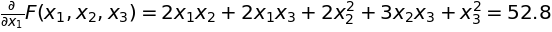

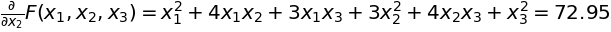

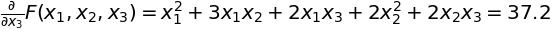

In [201]:
from sympy import *
x= [1.0,2.1,3.4]
init_printing(use_latex=True)
#F=Function('F')
x1,x2,x3,y1,y2,y3 = symbols('x_1 x_2 x_3 y_1 y_2 y_3')
F=Function('F')(x1,x2,x3)

y1= x2+x3
y2=x1+x2+x3
y3=x1+x2
F= y1 * y2 *y3
display(Eq(Function('F')(x1,x2,x3),F))    
Deriv_x1 = Derivative(Function('F')(x1,x2,x3),x1)
Deriv_x2 = Derivative(Function('F')(x1,x2,x3),x2)
Deriv_x3 = Derivative(Function('F')(x1,x2,x3),x3)
print ('Calculating gradients of F w.r.t x_1,x_2,x_3 using SymPy:')
subs={x1:x[0],x2:x[1],x3:x[2]}

display(Eq(Eq(Deriv_x1,\
              Derivative(F,x1).doit().expand()),\
           Derivative(F,x1).doit().evalf(subs=subs)))
display(Eq(Eq(Deriv_x2,\
              Derivative(F,x2).doit().expand()),\
           Derivative(F,x2).doit().evalf(subs=subs)))
display(Eq(Eq(Deriv_x3,\
              Derivative(F,x3).doit().expand()),\
           Derivative(F,x3).doit().evalf(subs=subs)))


### Tensorflow: Build a graph to compute a function's gradients and run a session out of the graph to evalute their values

In [214]:
import tensorflow as tf
def grad_calculate_tf():
    graph=tf.Graph()
    with graph.as_default():
        x1=tf.placeholder(dtype=tf.float32)
        x2=tf.placeholder(dtype=tf.float32)
        x3=tf.placeholder(dtype=tf.float32)
        X=[x1,x2,x3]
        y1=x2 + x3
        y2=x1 + x2 + x3
        y3=x1 + x2
        Y=[y1,y2,y3]
        F=y1 *y2 *y3
        # Calculate gradient of F w.r.t Y
        dF_dY=tf.gradients(F,Y)
        # Calculate gradient of F w.r.t X
        dF_dX=tf.gradients(F,X,name='dF_dX')
        # Calculate gradient of F w.r.t X using chain rule
        dF_dX_2=tf.gradients(Y,X,grad_ys=dF_dY,name='dF_dX_2')
        # Calculate gradient of F w.r.t [x1,y2,y3] with 'stop_gradients' param.
        # F=y1*y2*y3=(y2-x1)*y2*y3
        dF_dx1_y2_y3_stop_grad=tf.gradients((y2-x1)*y2*y3,[x1,y2,y3],stop_gradients=[x1,y2,y3])
        # Calculate gradient of F w.r.t [x1,y2,y3] without 'stop_gradients' param.
        dF_dx1_y2_y3=tf.gradients((y2-x1)*y2*y3,[x1,y2,y3])
        dF_dX_3=tf.gradients([x1,y2,y3],X,grad_ys=dF_dx1_y2_y3_stop_grad,name='dF_dX_3')
        dF_dX_4=tf.gradients([x1,y2,y3],X,grad_ys=dF_dx1_y2_y3,name='dF_dX_4')
        print ('Calculating gradieints of F w.r.t x1,x2,x3 using Tensorflow:')
        graph.add_to_collection('Gradients',dF_dX)
        graph.add_to_collection('Gradients',dF_dX_2)
        graph.add_to_collection('Gradients',dF_dX_3)
        graph.add_to_collection('Gradients',dF_dX_4)
        graph.add_to_collection('Gradients',dF_dx1_y2_y3)
        graph.add_to_collection('Gradients',dF_dx1_y2_y3_stop_grad)
        graph.add_to_collection('Inputs',x1)
        graph.add_to_collection('Inputs',x2)
        graph.add_to_collection('Inputs',x3)
        return graph

In [215]:
g=grad_calculate_tf()
x1, x2, x3 = g.get_collection('Inputs')
feed={x1:1.0,x2:2.1,x3:3.4}
dF_dX, dF_dX_2, dF_dX_3, dF_dX_4, dF_dx1_y2_y3, dF_dx1_y2_y3_stop_grad = g.get_collection('Gradients')

Calculating gradieints of F w.r.t x1,x2,x3 using Tensorflow:


In [216]:

with tf.Session(graph=g) as sess:
    # Verify that the first three gradients calculated are the same, and they are different from the 4th. one
    for gradient in [dF_dX,dF_dX_2,dF_dX_3,dF_dX_4] :
        print (sess.run(gradient,feed_dict=feed))
    # Verify that the first two gradients of F w.r.t x1 are the same,but they are different from the 3rd. one !
    print (sess.run(dF_dx1_y2_y3,feed_dict=feed)[0],sess.run(dF_dX,feed_dict=feed)[0],sess.run(dF_dx1_y2_y3_stop_grad,feed_dict=feed)[0])


[52.8, 72.95, 37.199997]
[52.8, 72.95, 37.199997]
[52.799995, 72.95, 37.199997]
[125.74999, 72.95, 37.199997]
52.799995 52.8 -20.15
